In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
print(faces.DESCR)

Populating the interactive namespace from numpy and matplotlib
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/mohit_cse_nitw/scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)


dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [4]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.547043


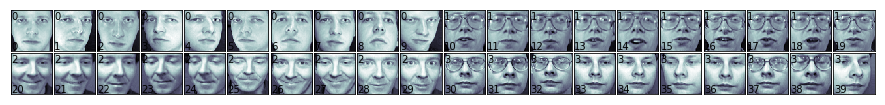

In [6]:
def print_faces(images,target , top_n):
    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    for  i in range(top_n):
        #we will print images in matrix 20x20
        p=fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        #label the image with target value
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))
        
print_faces(faces.images,faces.target,40)
    

In [7]:
#create svm model
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc_1 = svm.SVC(kernel='linear', C=1,gamma='auto')

In [8]:
#split the data
from sklearn.model_selection import train_test_split
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=num_test, random_state=33)


In [16]:
#from sklearn.cross_validation import cross_val_score, KFold
#from scipy.stats import sem

#def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    
    # by default the score used is the one returned by score method of the estimator (accuracy)
   

In [9]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [10]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9875
Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         2
         11       1.00      1.00      1.00         1
         12       1.00      0.50      0.67         2
         13       1.00      1.00      1.00         1
         14       0.75      1.00      0.86         3
         17       1.00      1.00      1.00         2
         18       1.00      1.00      1.00         2
         19       1.00      1.00      1.00         3
         20       1.00      1.00      1.00         2
         21  